# Machine Learning and Statistics Assignment Part 2 - scipy.stats
---

<br>

![scikit_logo](Images/scipy_logo.png)

<br>

Scipy.stats is a sub-package of the SciPy library and is used primarily for statistics. Scipy itself is a powerful library used to perform mathematical, scientific and engineering computations, and is built and depends upon the NumPy library.  
Scipy.stats "contains a large number of probability distributions, summary and frequency statistics, correlation functions and statistical tests, masked statistics, kernel density estimation, quasi-Monte Carlo functionality, and more." https://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats

<br>

### One Way ANOVA

ANOVA comes from 'analysis of variance'. A one-way ANOVA test compares the means of two or more independent groups in order to determine whether there is statistical evidence that the associated population means are significantly different. The one-way refers to one independent variable - there is also a two-way ANOVA tests which takes two independent variables and multiple categorical groups. Here we will focus on one-way.  
In a one-way ANOVA there are two possible hypotheses - Null and Alternative. The null hypothesis is that there is no difference between the groups while the alternative is the opposite.  

We begin by importing all of the necessary libraries.

In [74]:
# For data frames
import pandas as pd

# For plots
import seaborn as sns

# For statistics
import scipy.stats as ss

# Numerical arrays
import numpy as np

<br>

### Example: The Wine dataset

![scikit_logo](Images/wine_bottles.jpg)

We're going to use the the wine dataset again!

In [66]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", header=None)

In [67]:
df.columns = ['wine_name','alcohol','malicAcid','ash','ashalcalinity','magnesium','totalPhenols','flavanoids'
              ,'nonFlavanoidPhenols','proanthocyanins','colorIntensity','hue','od280_od315','proline']
df

,wine_name,alcohol,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


We can summarise the data in scipy.stats using a similar function to pandas although it's not nearly as pretty!

In [76]:
# summarise the data
ss.describe(df)

DescribeResult(nobs=178, minmax=(array([1.000e+00, 1.103e+01, 7.400e-01, 1.360e+00, 1.060e+01, 7.000e+01,
       9.800e-01, 3.400e-01, 1.300e-01, 4.100e-01, 1.280e+00, 4.800e-01,
       1.270e+00, 2.780e+02]), array([3.000e+00, 1.483e+01, 5.800e+00, 3.230e+00, 3.000e+01, 1.620e+02,
       3.880e+00, 5.080e+00, 6.600e-01, 3.580e+00, 1.300e+01, 1.710e+00,
       4.000e+00, 1.680e+03])), mean=array([1.93820225e+00, 1.30006180e+01, 2.33634831e+00, 2.36651685e+00,
       1.94949438e+01, 9.97415730e+01, 2.29511236e+00, 2.02926966e+00,
       3.61853933e-01, 1.59089888e+00, 5.05808988e+00, 9.57449438e-01,
       2.61168539e+00, 7.46893258e+02]), variance=array([6.00679236e-01, 6.59062328e-01, 1.24801540e+00, 7.52646353e-02,
       1.11526862e+01, 2.03989335e+02, 3.91689535e-01, 9.97718673e-01,
       1.54886339e-02, 3.27594668e-01, 5.37444938e+00, 5.22449607e-02,
       5.04086409e-01, 9.91667174e+04]), skewness=array([ 0.10652368, -0.05104747,  1.0308695 , -0.17520678,  0.21124733,
        1

For the data to be appropriate for one-way ANOVA, it has to pass six assumptions. The following assumptions are taken from https://statistics.laerd.com/spss-tutorials/one-way-anova-using-spss-statistics.php. We are going to test the alcohol variable with each of the assumptions.

<br>

### Assumption 1: Dependent variable

>"Your dependent variable should be measured at the interval or ratio level (i.e., they are continuous)"

In [45]:
# extract the 'alcohol' variable
dependent = df['alcohol']
dependent

0      14.23
1      13.20
2      13.16
3      14.37
4      13.24
       ...  
173    13.71
174    13.40
175    13.27
176    13.17
177    14.13
Name: alcohol, Length: 178, dtype: float64

In [46]:
dependent.describe()

count    178.000000
mean      13.000618
std        0.811827
min       11.030000
25%       12.362500
50%       13.050000
75%       13.677500
max       14.830000
Name: alcohol, dtype: float64

**PASS:** All of the values are numbers on a sclae so fairly clear it satifies this assumption.

<br>

### Assumption 2: Independent variable

>"Your independent variable should consist of two or more categorical, independent groups. Typically, a one-way ANOVA is used when you have three or more categorical, independent groups."

We are going to use 'wine_name' as the independent variable. Because they are named using numbers, we are going to have some trouble further down the line! The function **dtypes** confirms the data types.

In [79]:
# return data types for each variable
df.dtypes

wine_name                int64
alcohol                float64
malicAcid              float64
ash                    float64
ashalcalinity          float64
magnesium                int64
totalPhenols           float64
flavanoids             float64
nonFlavanoidPhenols    float64
proanthocyanins        float64
colorIntensity         float64
hue                    float64
od280_od315            float64
proline                  int64
dtype: object

As the data type for wine_name is int64, the following code converts that to a string.

In [80]:
# convert wine name to a string - https://datacarpentry.org/python-ecology-lesson/04-data-types-and-format/
df['wine_name'] = df['wine_name'].astype('str')

In [83]:
# confirm the data type
df['wine_name'].dtype

dtype('O')

**PASS:** we have three independent variables to test

<br>

### Assumption 3: Independence of observations

>"You should have independence of observations, which means that there is no relationship between the observations in each group or between the groups themselves. For example, there must be different participants in each group with no participant being in more than one group. This is more of a study design issue than something you can test for, but it is an important assumption of the one-way ANOVA."

We had no involvement in the collection of this data but it seems to fulfull this criteria. so **PASS** 

<br>

### Assumption 4: Outliers

>"There should be no significant outliers"

We will use a boxplot to see if there are any outliers.

<AxesSubplot:xlabel='alcohol', ylabel='wine_name'>

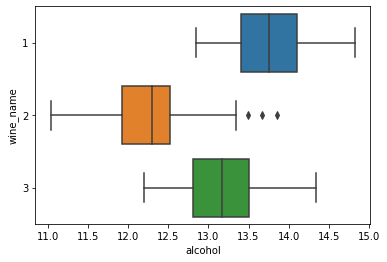

In [40]:
# https://seaborn.pydata.org/generated/seaborn.boxplot.html
sns.boxplot(x=dependent, y=independent)

Looks like we have a few outliers in wine 2! May be an issue but we'll carry on for now.

<br>

### Assumption 5: Normality  

>"Your dependent variable should be approximately normally distributed for each category of the independent variable. We talk about the one-way ANOVA only requiring approximately normal data because it is quite "robust" to violations of normality, meaning that assumption can be a little violated and still provide valid results."

We use seaborn create a KDE plot to visualise the normality or otherwise.

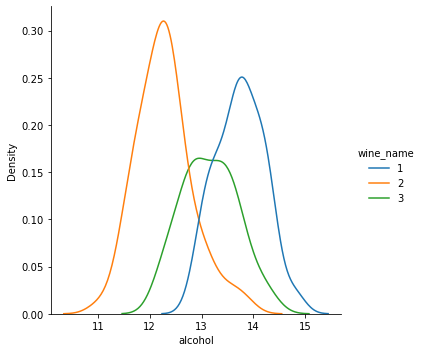

In [87]:
# KDEs of the three categories.
sns.displot(x=dependent, hue=independent, kind="kde")

They all look roughly normal, but we can use a **shapiro-wilk** test to get a clearer idea. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html  
https://statistics.laerd.com/spss-tutorials/testing-for-normality-using-spss-statistics.php  

In [92]:
# shapiro-wilk test on wine 1
ss.shapiro(dependent[independent == '1'])

ShapiroResult(statistic=0.9808937311172485, pvalue=0.47905755043029785)

In [93]:
# shapiro-wilk test on wine 2
ss.shapiro(dependent[independent == '2'])

ShapiroResult(statistic=0.9720516800880432, pvalue=0.11396162211894989)

In [94]:
# shapiro-wilk test on wine 3
ss.shapiro(dependent[independent == '3'])

ShapiroResult(statistic=0.981467604637146, pvalue=0.6408376097679138)

If the pvalue is above 0.05 we can reject the null hypothesis. So **PASS**.

<br>

### Assumption 6: Homogeneity of Variances  

>"There needs to be homogeneity of variances. You can test this assumption ... using Levene's test for homogeneity of variances."

We use the built-in **levene()** function to test for variances - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html

In [12]:
# Test for equal variances.
ss.levene(
    dependent[independent == 1],
    dependent[independent == 2],
    dependent[independent == 3]
)

LeveneResult(statistic=0.5997889815519192, pvalue=0.5500519055097621)

We're above 0.05 so we can reject the null hypothesis. So **PASS**.

<br>

## One-way ANOVA

Although the reslts of assumption 4 with the outliers looks a bit shakey we'll continue with the test. The functions for carrying this out in scipy.stats is **f_oneway()**. 
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html

We pass each of the independent variables into the functions.

In [96]:
# ANOVA.
ss.f_oneway(
    dependent[independent == '1'],
    dependent[independent == '2'],
    dependent[independent == '3']
)

F_onewayResult(statistic=135.07762424279912, pvalue=3.319503795619655e-36)

Conclusion: as the pvalue is miniscule we can conlude that the mean alcohol level of **at least one** of the wines is different. To find out which one or ones are different we need to carry out a **post hoc** test.

<br>

### Tukey Post Hoc test

<br>

## REFERENCES
---

https://docs.scipy.org/doc/scipy/reference/stats.html  
https://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats

https://www.tutorialspoint.com/scipy/scipy_stats.htm

https://realpython.com/python-statistics/

# END